<a href="https://colab.research.google.com/github/zraza10/Decision-Model/blob/main/Decision_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import tree 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
import io
from google.colab import files
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
SEED=12345



In [ ]:
uploaded =files.upload()

Saving credit_line_increase.csv to credit_line_increase (1).csv


In [ ]:
type(uploaded)



dict

In [ ]:
uploaded.keys()

dict_keys(['credit_line_increase.csv'])

In [ ]:
data=pd.read_csv(io.StringIO(uploaded["credit_line_increase.csv"].decode('utf-8')))

In [ ]:
data

ID  LIMIT_BAL  SEX  RACE  ...  PAY_AMT4  PAY_AMT5  PAY_AMT6  DELINQ_NEXT
0          1      20000    2   1.0  ...         0         0         0            1
1          2     120000    2   2.0  ...      1000         0      2000            1
2          3      90000    2   3.0  ...      1000      1000      5000            0
3          4      50000    2   4.0  ...      1100      1069      1000            0
4          5      50000    1   3.0  ...      9000       689       679            0
...      ...        ...  ...   ...  ...       ...       ...       ...          ...
29995  29996     220000    1   4.0  ...      3047      5000      1000            0
29996  29997     150000    1   4.0  ...       129         0         0            0
29997  29998      30000    1   1.0  ...      4200      2000      3100            1
29998  29999      80000    1   2.0  ...      1926     52964      1804            1
29999  30000      50000    1   2.0  ...      1000      1000      1000            1

[30000 rows x 26 columns]

In [ ]:
data.shape

(30000, 26)

In [ ]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'RACE', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DELINQ_NEXT'],
      dtype='object')

In [ ]:
data.isnull().any()

ID             False
LIMIT_BAL      False
SEX            False
RACE           False
EDUCATION      False
MARRIAGE       False
AGE            False
PAY_0          False
PAY_2          False
PAY_3          False
PAY_4          False
PAY_5          False
PAY_6          False
BILL_AMT1      False
BILL_AMT2      False
BILL_AMT3      False
BILL_AMT4      False
BILL_AMT5      False
BILL_AMT6      False
PAY_AMT1       False
PAY_AMT2       False
PAY_AMT3       False
PAY_AMT4       False
PAY_AMT5       False
PAY_AMT6       False
DELINQ_NEXT    False
dtype: bool

In [ ]:
data.describe()

ID       LIMIT_BAL  ...       PAY_AMT6   DELINQ_NEXT
count  30000.000000    30000.000000  ...   30000.000000  30000.000000
mean   15000.500000   167484.322667  ...    5215.502567      0.221200
std     8660.398374   129747.661567  ...   17777.465775      0.415062
min        1.000000    10000.000000  ...       0.000000      0.000000
25%     7500.750000    50000.000000  ...     117.750000      0.000000
50%    15000.500000   140000.000000  ...    1500.000000      0.000000
75%    22500.250000   240000.000000  ...    4000.000000      0.000000
max    30000.000000  1000000.000000  ...  528666.000000      1.000000

[8 rows x 26 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f06d6d19450>,
      dtype=object)

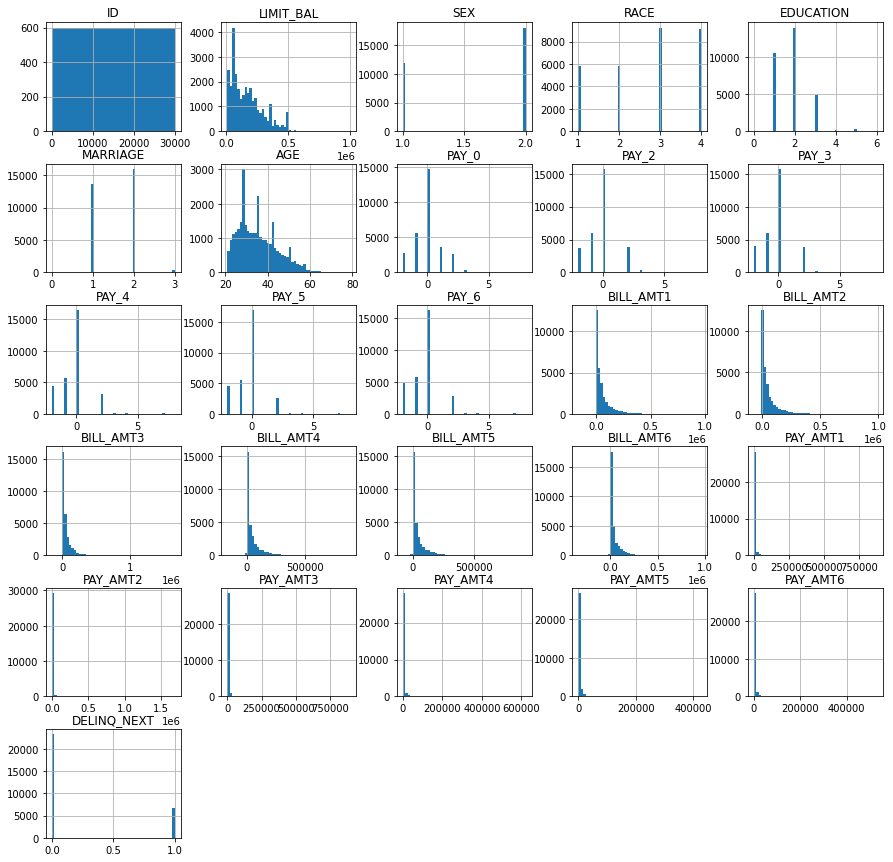

In [ ]:
data[data.columns].hist(bins=50,figsize=(15,15))

In [ ]:
corr=data.corr()
corr

ID  LIMIT_BAL       SEX  ...  PAY_AMT5  PAY_AMT6  DELINQ_NEXT
ID           1.000000   0.026179  0.018497  ...  0.000652  0.003000    -0.013952
LIMIT_BAL    0.026179   1.000000  0.024755  ...  0.217202  0.219595    -0.153520
SEX          0.018497   0.024755  1.000000  ... -0.001667 -0.002766    -0.039961
RACE        -0.000710   0.044173  0.006149  ...  0.022148  0.020259    -0.303811
EDUCATION    0.039177  -0.219161  0.014232  ... -0.040358 -0.037200     0.028006
MARRIAGE    -0.029079  -0.108139 -0.031389  ... -0.001205 -0.006641    -0.024339
AGE          0.018678   0.144713 -0.090874  ...  0.022850  0.019478     0.013890
PAY_0       -0.030575  -0.271214 -0.057643  ... -0.058190 -0.058673     0.324794
PAY_2       -0.011215  -0.296382 -0.070771  ... -0.037093 -0.036500     0.263551
PAY_3       -0.018494  -0.286123 -0.066096  ... -0.035863 -0.035861     0.235253
PAY_4       -0.002735  -0.267460 -0.060173  ... -0.033590 -0.026565     0.216614
PAY_5       -0.022199  -0.249411 -0.055064  ... -0.033337 -0.023027     0.204149
PAY_6       -0.020270  -0.235195 -0.044008  ... -0.046434 -0.025299     0.186866
BILL_AMT1    0.019389   0.285430 -0.033642  ...  0.167026  0.179341    -0.019644
BILL_AMT2    0.017982   0.278314 -0.031183  ...  0.157957  0.174256    -0.014193
BILL_AMT3    0.024354   0.283236 -0.024563  ...  0.179712  0.182326    -0.014076
BILL_AMT4    0.040351   0.293988 -0.021880  ...  0.160433  0.177637    -0.010156
BILL_AMT5    0.016705   0.295562 -0.017005  ...  0.141574  0.164184    -0.006760
BILL_AMT6    0.016730   0.290389 -0.016733  ...  0.307729  0.115494    -0.005372
PAY_AMT1     0.009742   0.195236 -0.000242  ...  0.148459  0.185735    -0.072929
PAY_AMT2     0.008406   0.178408 -0.001391  ...  0.180908  0.157634    -0.058579
PAY_AMT3     0.039151   0.210167 -0.008597  ...  0.159214  0.162740    -0.056250
PAY_AMT4     0.007793   0.203242 -0.002229  ...  0.151830  0.157834    -0.056827
PAY_AMT5     0.000652   0.217202 -0.001667  ...  1.000000  0.154896    -0.055124
PAY_AMT6     0.003000   0.219595 -0.002766  ...  0.154896  1.000000    -0.053183
DELINQ_NEXT -0.013952  -0.153520 -0.039961  ... -0.055124 -0.053183     1.000000

[26 rows x 26 columns]

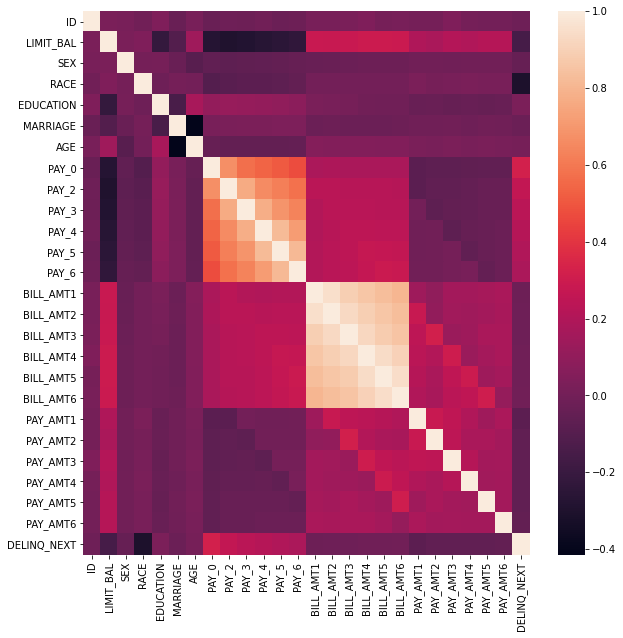

In [ ]:
plt.figure(figsize=(10, 10))
_= sns.heatmap(corr,xticklabels='auto', yticklabels='auto')

In [ ]:
y_name='DELINQ_NEXT'
x_names=['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
       

In [ ]:
train_x, valid_test_x,train_y,valid_test_y=train_test_split(data[x_names],data[y_name], test_size=0.5,random_state=SEED)
valid_x, test_x, valid_y, test_y=train_test_split(valid_test_x, valid_test_y,test_size=0.1, random_state=SEED)
print('Training data: %i rows and %i columns' % (train_x.shape[0],train_x.shape[1]+1))
print('Validation data: %i rows and %i columns' % (valid_x.shape[0],valid_x.shape[1]+1))
print('Validation data: %i rows and %i columns' % (test_x.shape[0],test_x.shape[1]+1))

del valid_test_x
del valid_test_y


Training data: 15000 rows and 20 columns
Validation data: 13500 rows and 20 columns
Validation data: 1500 rows and 20 columns


In [ ]:
max_depth=12
candidate_models={}
for depth in range (0, max_depth):
  clf=tree.DecisionTreeClassifier(max_depth=depth+1)
  clf.fit(train_x,train_y)
  train_phat=clf.predict_proba(train_x)[:,1]
  valid_phat=clf.predict_proba(valid_x)[:,1]
  train_auc=roc_auc_score(train_y, train_phat)
  valid_auc=roc_auc_score(valid_y, valid_phat)
  cv_scores=cross_val_score(clf,valid_x,valid_y, scoring='roc_auc', cv=5)
  cv_std=np.std(cv_scores)
  candidate_models[depth+1]={}
  candidate_models[depth+1]['Model']=clf
  candidate_models[depth+1]['Training_auc']=train_auc
  candidate_models[depth+1]['validation of auc']=valid_auc
  candidate_models[depth+1]['5 fold sd']=cv_std


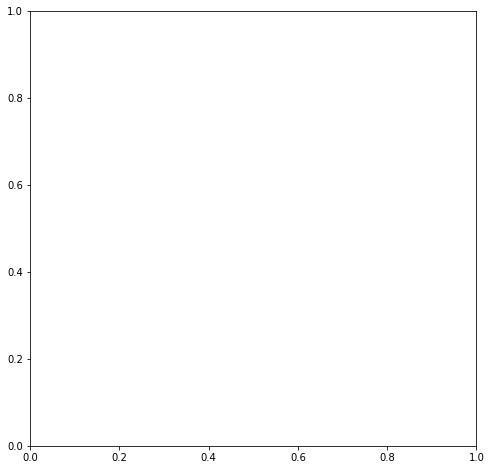

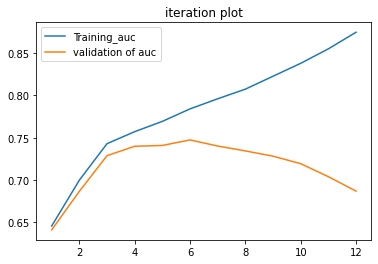

In [ ]:
  candidate_results=pd.DataFrame.from_dict(candidate_models,orient='index')
  fig.ax=plt.subplots(figsize=(8,8))
  _=candidate_results[['Training_auc', 'validation of auc']].plot(title='iteration plot')
  _=_=ax.set_xlabel('Tree Depth')
  _=ax.set_ylabel('AUC')

In [ ]:
candidate_results.iloc[:,1:]

Training_auc  validation of auc  5 fold sd
1       0.645748           0.640982   0.012335
2       0.699912           0.686578   0.009972
3       0.742968           0.728875   0.011201
4       0.757178           0.738161   0.010966
5       0.769331           0.738294   0.010745
6       0.784010           0.744885   0.010680
7       0.795777           0.738266   0.012244
8       0.807427           0.734124   0.011266
9       0.823129           0.729455   0.009226
10      0.837754           0.718233   0.013151
11      0.854962           0.702400   0.016410
12      0.874614           0.685521   0.019862

In [ ]:
best_model=candidate_models[6]['Model']
fig=plt.figure(figsize=(400,76))
_=tree.plot_tree(best_model,feature_names=x_names,class_names=['On time','Delinquet'],filled=True)

In [ ]:
test_phat=best_model.predict_proba(test_x)[:, 1]
print('test AUC: %.4f' % roc_auc_score(test_y,test_phat))

test AUC: 0.7433
